In [1]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
from utils.helpers import extract_images_and_labels_zurich, extract_images
from src.images_preprocessing import preprocess_images_zurich

### Visualize

Visualization is done with all images.

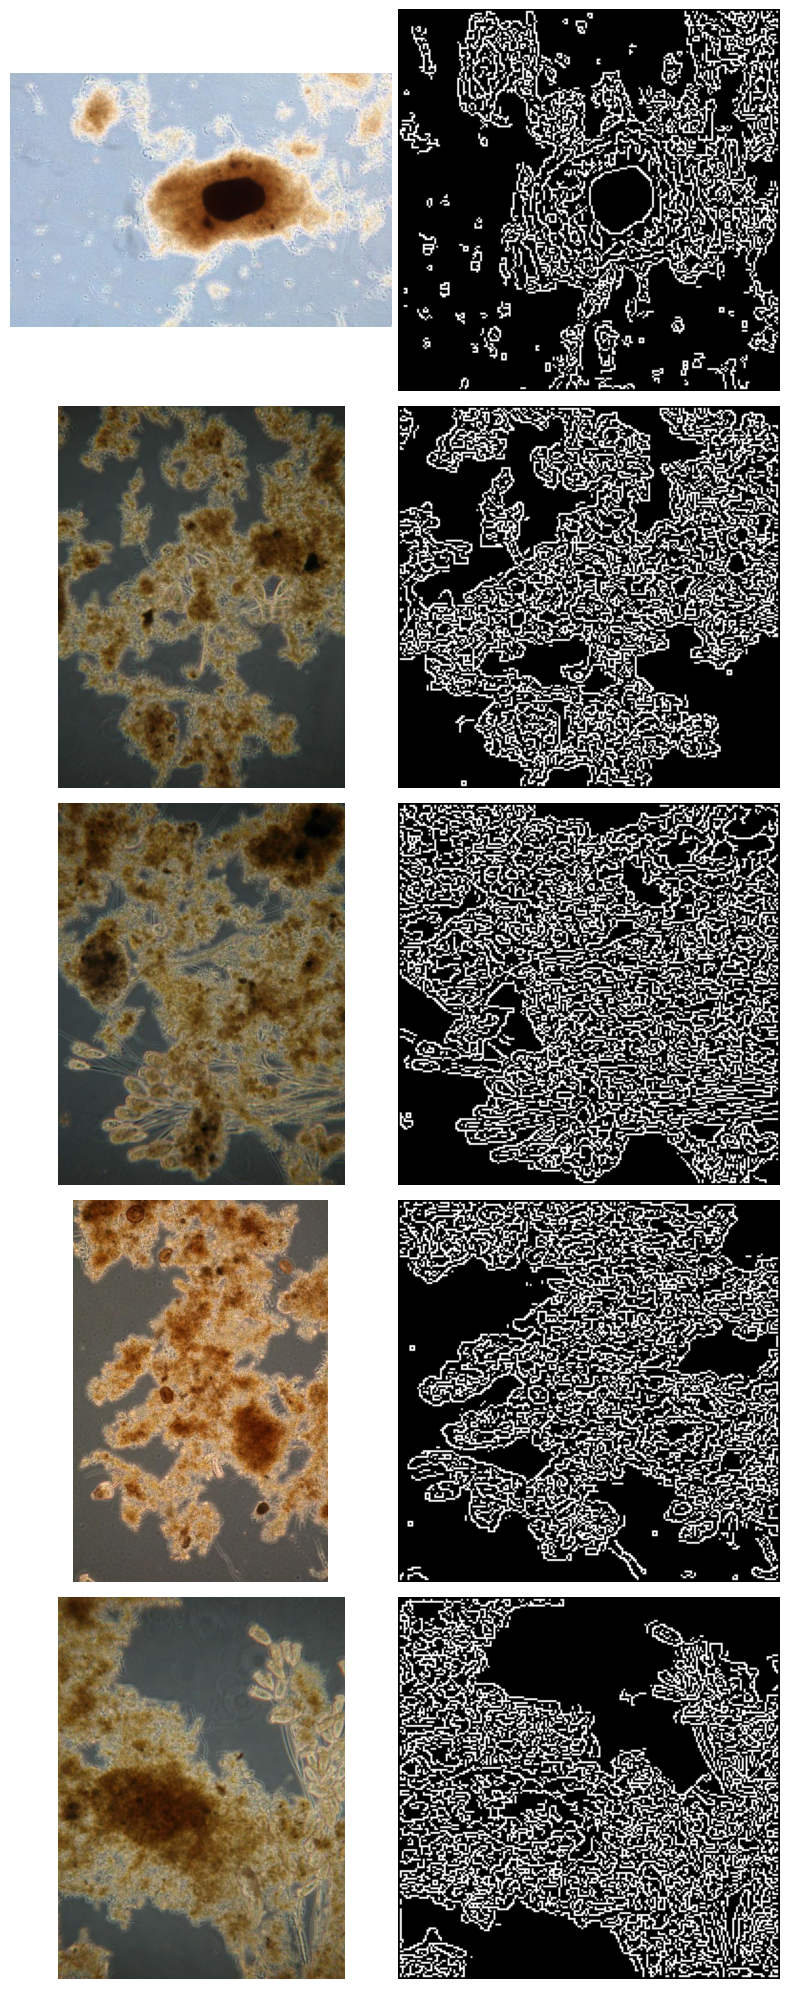

In [10]:
#Load and preprocess images (edge detection + flatten)
image_folder = r'C:\Users\lover37\OneDrive - Université Laval\Documenten_Loes\data\data_plant_zurich\Mikroskopie_structured'
TSS_file = r'C:\Users\lover37\OneDrive - Université Laval\Documenten_Loes\data\data_plant_zurich\SST_TSS.csv'
TSS=pd.read_csv(TSS_file, index_col=0)

all_img_paths, all_labels = extract_images_and_labels_zurich(image_folder, TSS, start_folder='2013-01-08', end_folder='2024-11-28')

all_images_processed=preprocess_images_zurich(all_img_paths=all_img_paths, size=(200,200), method='edges', flatten=True, show_example=True)

In [11]:
n_neighbors=150
min_dist=1

fitted_umap = umap.UMAP(n_neighbors=n_neighbors, #default 15
                    min_dist=min_dist, #default 0.1
                    metric='l1', #default categorical
                    random_state=42,
                    n_components=3)
embeddings_all_visualisation=fitted_umap.fit_transform(all_images_processed)

c:\Users\lover37\AppData\Local\anaconda3\envs\parallel_HM_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


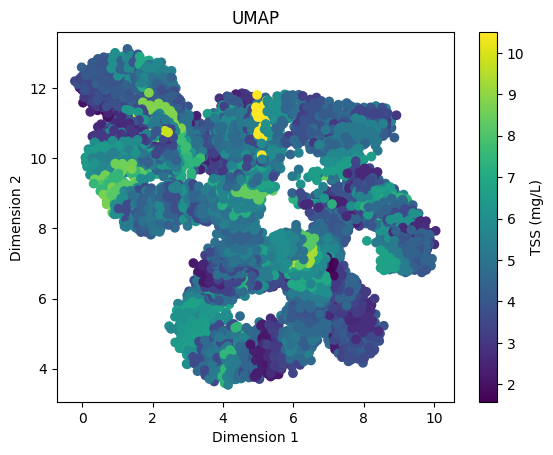

In [12]:
# create 2D figure
plt.figure()
sc=plt.scatter(embeddings_all_visualisation[:,0], embeddings_all_visualisation[:,1], c=all_labels)
cbar = plt.colorbar(sc)
cbar.set_label('TSS (mg/L)') 
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title(f"UMAP")
#plt.savefig('results/visualisation/UMAP/2Dscatter_plot_all_images_edgedetection.pdf')
#plt.savefig('results/visualisation/UMAP/2Dscatter_plot_all_images_edgedetection.png')
plt.show()

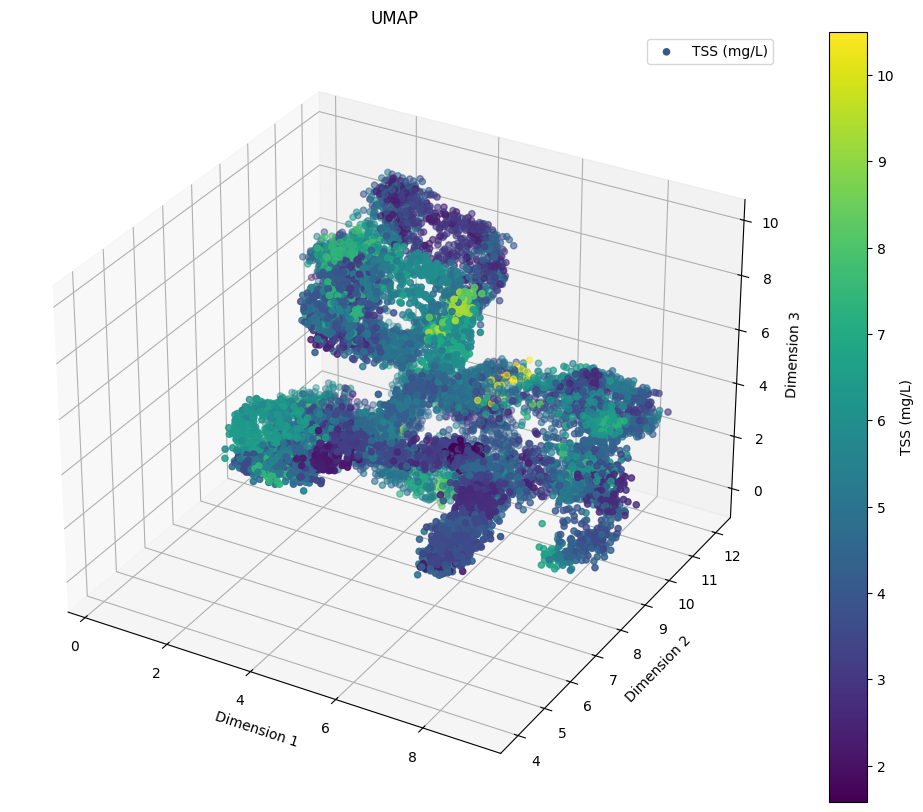

In [ ]:
# 3D plot 
threshold = 250
image_labels2 = all_labels.ravel()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_all_visualisation[:, 0], 
                embeddings_all_visualisation[:, 1], 
                embeddings_all_visualisation[:, 2], 
                c=all_labels, cmap='viridis', label='TSS (mg/L)')
cbar = plt.colorbar(sc)
cbar.set_label('TSS (mg/L)')
plt.legend()
#ax.view_init(elev=25, azim=30)  # Change elevation and azimuth angles
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_xlim(min(embeddings_all_visualisation[:, 0]), max(embeddings_all_visualisation[:, 0])*0.95)  # Example zoom for x-axis
ax.set_ylim(min(embeddings_all_visualisation[:, 1]), max(embeddings_all_visualisation[:, 1])*0.95)  # Example zoom for y-axis
ax.set_zlim(min(embeddings_all_visualisation[:, 2]), max(embeddings_all_visualisation[:, 2])*0.95)  # Example zoom for z-axis
plt.tight_layout() 
plt.title(f"UMAP")
plt.savefig('results/zurich/visualisation/UMAP/3Dscatter_edgedetection.pdf')
plt.savefig('results/zurich/visualisation/UMAP/3Dscatter_edgedetection.png')
plt.show()